In [ ]:
# Author: Eddie Carrizales
# Date: March 20, 2024

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Medical Insurance Cost Prediction using Neural Network built from scratch
# Dataset Source: https://www.kaggle.com/datasets/rahulvyasm/medical-insurance-cost-prediction

url = "https://drive.google.com/file/d/12k1AVTnReDPuhcrtlPO069xfDwrwWOEj/view?usp=sharing"
file_id = url.split("/")[-2]
dwn_url = "https://drive.google.com/uc?id=" + file_id

In [ ]:
original_df = pd.read_csv(dwn_url) #read the file

In [ ]:
# Display our data in rows x columns with the column names
original_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [ ]:
# ------ Pre-processing dataset and data Summary ------

In [ ]:
# First lets check if there are any empty rows or values in our data
# (If there are we will have to remove them or fill them in with generated data)
empty_rows = original_df.isnull().any(axis = 1)
rows_with_missing_values = original_df[empty_rows]

# And as we can see, there are no rows with missing values
rows_with_missing_values # shows rows

,age,sex,bmi,children,smoker,region,charges


In [ ]:
# This will display the variable types of our data (As we can see we have many different types of data so we have to convert it all to numerical)
original_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
# Lets use one-hot encoding to convert the categorical columns to numerical
numerical_df = pd.get_dummies(original_df, columns= ["sex", "smoker", "region"])
numerical_df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2767,47,45.320,1,8569.86180,1,0,1,0,0,0,1,0
2768,21,34.600,0,2020.17700,1,0,1,0,0,0,0,1
2769,19,26.030,1,16450.89470,0,1,0,1,0,1,0,0
2770,23,18.715,0,21595.38229,0,1,1,0,0,1,0,0


In [ ]:
# Now all our data is numerical, I will just move the charges column to the end to keep a nice format
# Also, because our charges will be what we are trying to predict
colms = numerical_df.columns.to_list()
colms.remove("charges")
colms.append("charges")
numerical_df = numerical_df[colms]

numerical_df # show our dataframe

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,27.900,0,1,0,0,1,0,0,0,1,16884.92400
1,18,33.770,1,0,1,1,0,0,0,1,0,1725.55230
2,28,33.000,3,0,1,1,0,0,0,1,0,4449.46200
3,33,22.705,0,0,1,1,0,0,1,0,0,21984.47061
4,32,28.880,0,0,1,1,0,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...,...
2767,47,45.320,1,1,0,1,0,0,0,1,0,8569.86180
2768,21,34.600,0,1,0,1,0,0,0,0,1,2020.17700
2769,19,26.030,1,0,1,0,1,0,1,0,0,16450.89470
2770,23,18.715,0,0,1,1,0,0,1,0,0,21595.38229


In [ ]:
# This function provides a summary of various statistics to understand the values in our data
original_df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Now, I will normalize all of the data so that it is at the same scale, allowing for better convergence later
scaler = MinMaxScaler()
numerical_normalized_df = pd.DataFrame(scaler.fit_transform(numerical_df), columns= numerical_df.columns)

numerical_normalized_df # show our dataframe

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,0.021739,0.321227,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.251611
1,0.000000,0.479150,0.2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.009636
2,0.217391,0.458434,0.6,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.053115
3,0.326087,0.181464,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.333010
4,0.304348,0.347592,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.043816
...,...,...,...,...,...,...,...,...,...,...,...,...
2767,0.630435,0.789884,0.2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.118885
2768,0.065217,0.501480,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.014339
2769,0.021739,0.270917,0.2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.244683
2770,0.108696,0.074119,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.326799


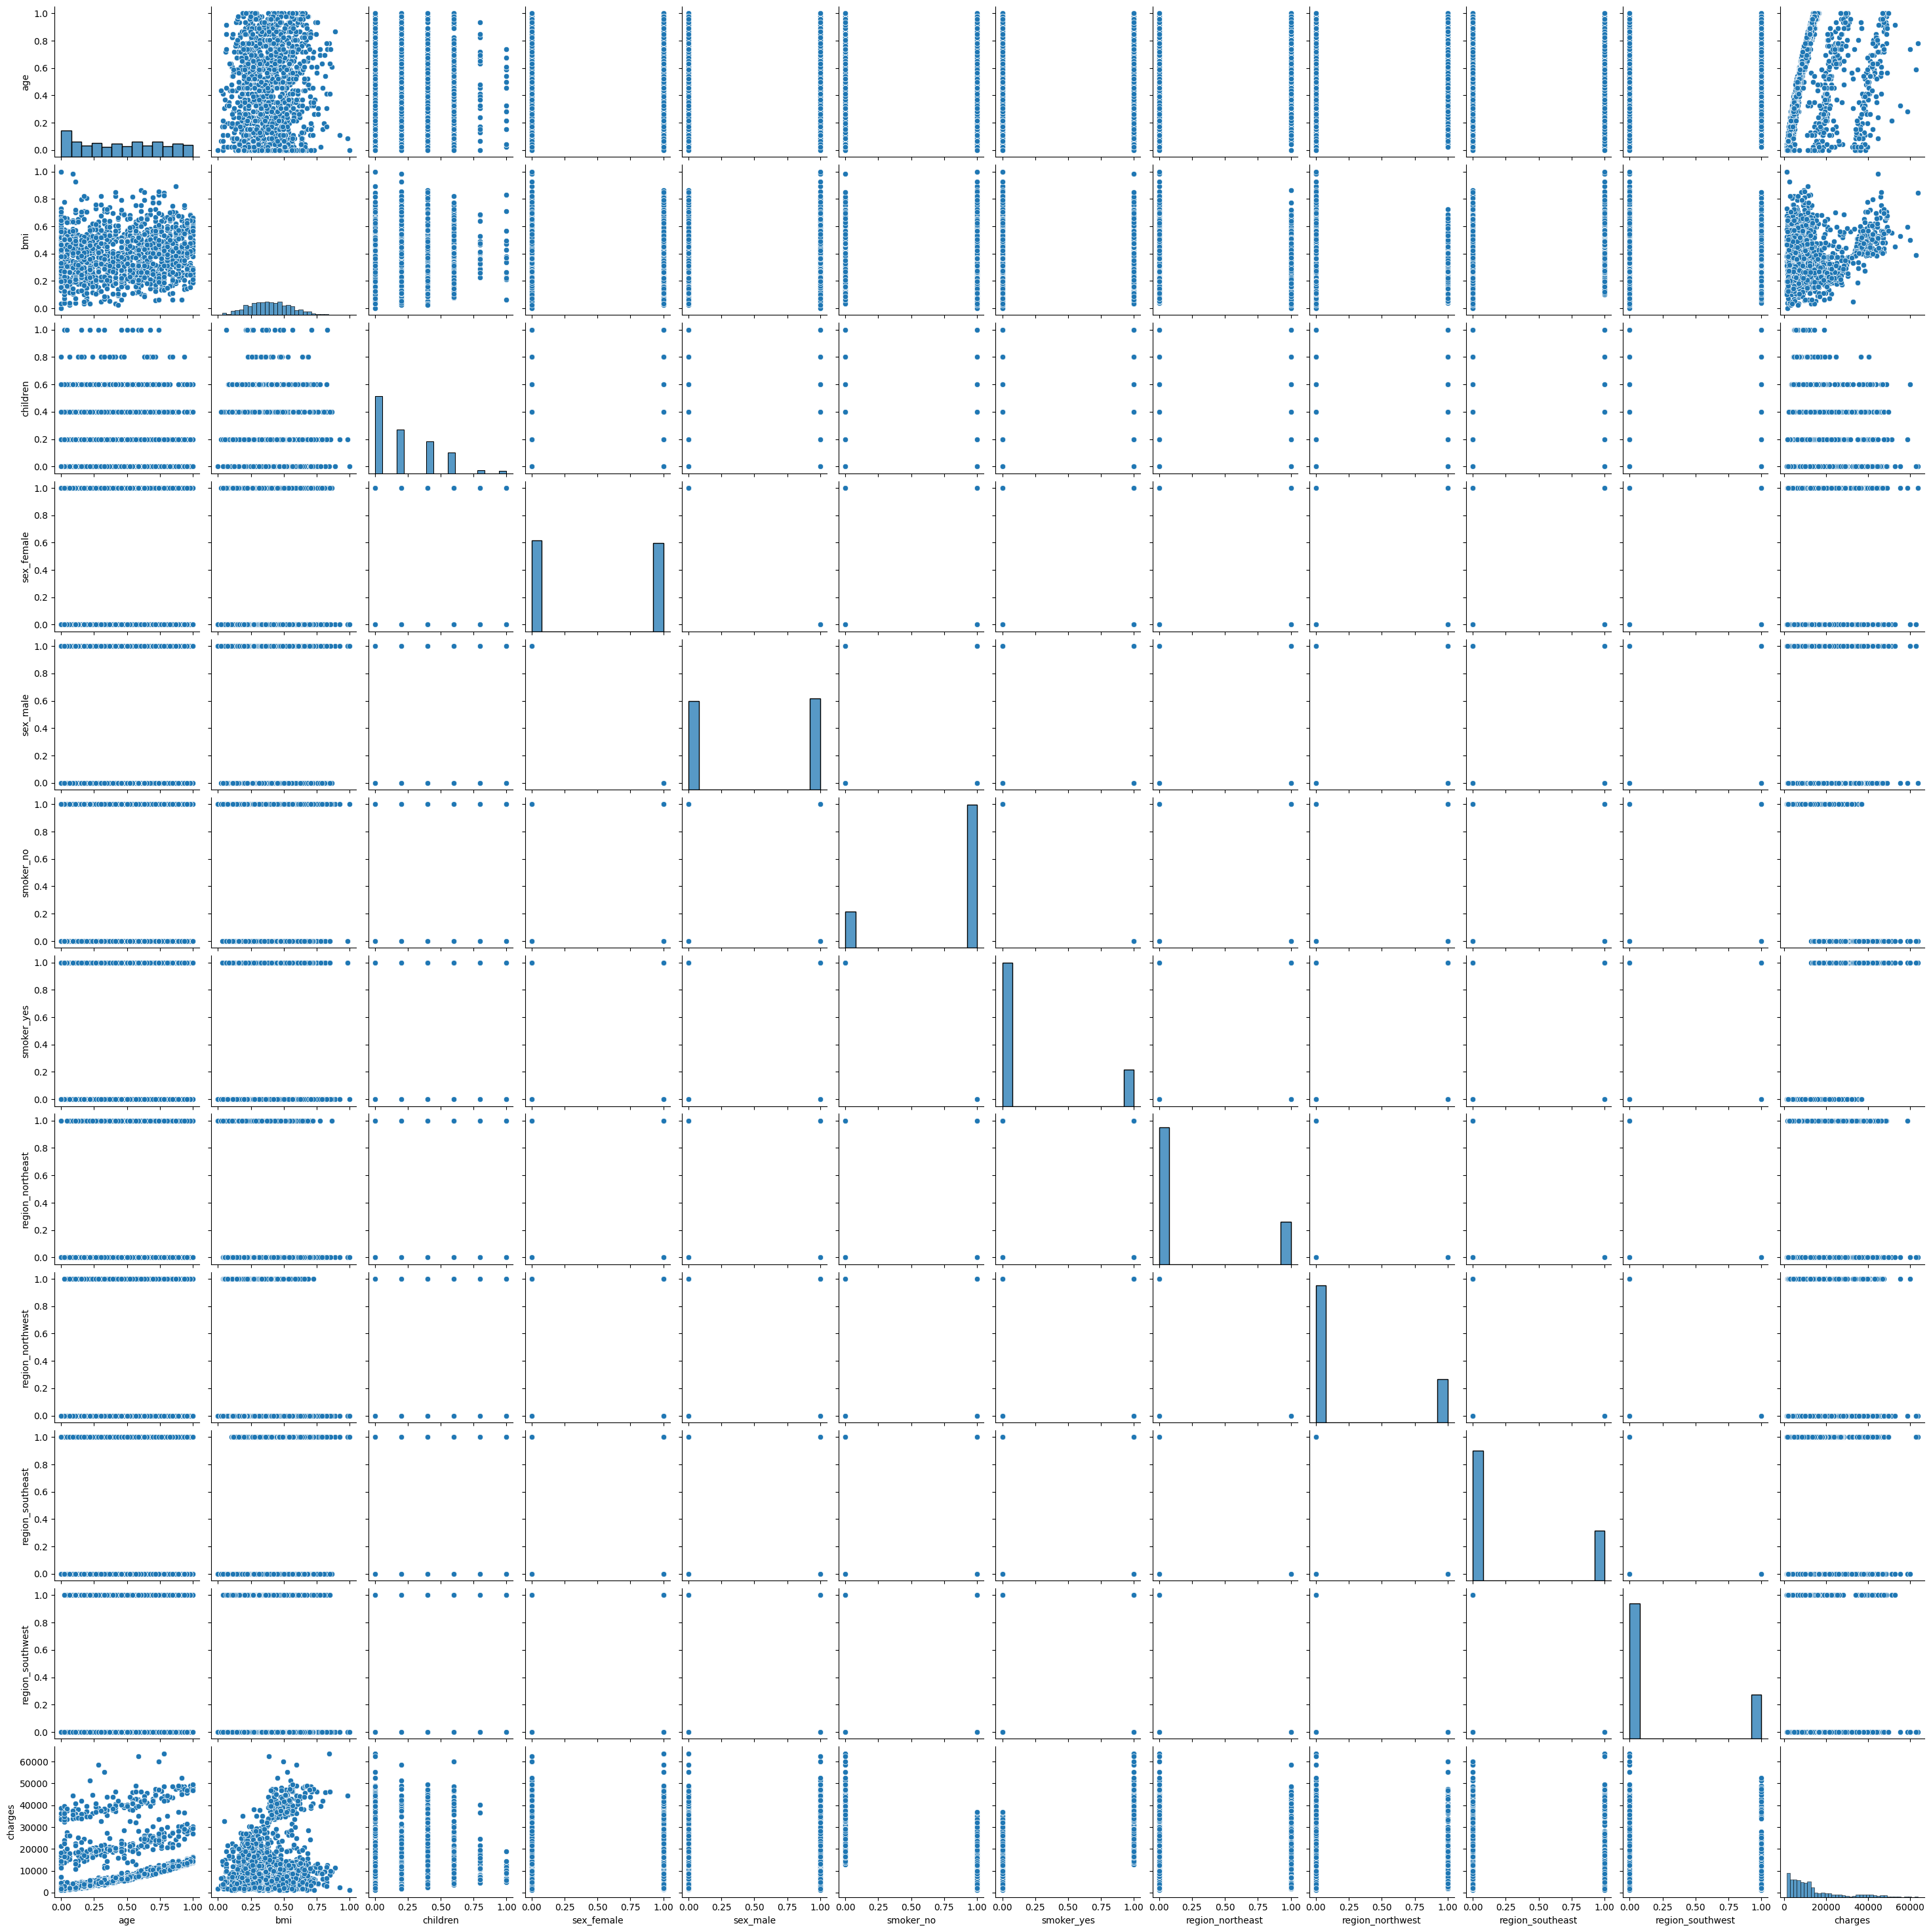

In [ ]:
# Now lets create some plots to understand how our data is distributed and to see if we can visualize any patterns in the data
sns.pairplot(data = numerical_normalized_df)

In [ ]:
# Finally, we will check the correlation between the features and the charges column
# We are trying to predict the medical Insurance cost, and using corr() we are able to see the
#   correlation that each of the columns has to the charge/cost of medical insurance

# And as we can see there are positive and negative values describing how strongly each
#   column correlates with the charges/cost of medical insurance

# So the way we can use this information is we take the absolute value of the number
#   and the closer this number is 1.0 the more it correlates with the charges
numerical_normalized_df.corr()["charges"]

age                 0.298624
bmi                 0.199846
children            0.066442
sex_female         -0.062837
sex_male            0.062837
smoker_no          -0.788783
smoker_yes          0.788783
region_northeast    0.009850
region_northwest   -0.036874
region_southeast    0.075652
region_southwest   -0.051686
charges             1.000000
Name: charges, dtype: float64

In [ ]:
numerical_normalized_df

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,0.021739,0.321227,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.251611
1,0.000000,0.479150,0.2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.009636
2,0.217391,0.458434,0.6,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.053115
3,0.326087,0.181464,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.333010
4,0.304348,0.347592,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.043816
...,...,...,...,...,...,...,...,...,...,...,...,...
2767,0.630435,0.789884,0.2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.118885
2768,0.065217,0.501480,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.014339
2769,0.021739,0.270917,0.2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.244683
2770,0.108696,0.074119,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.326799


In [ ]:
# ------ Train, Test, Split (80/20)-------

In [ ]:
# Now lets split the data into train and test, I will do 80/20
# X will hold the features and Y will hold the target variable
X = numerical_normalized_df.drop(columns= ["charges"]) # we take all columns except for "charges"
y = numerical_normalized_df["charges"]   # We only take "charges" column

# Splitting the training data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # 80/20

In [ ]:
# Now since we will be working with matrices, we must convert to np.array()
X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
X_train

array([[0.04347826, 0.44215765, 0.2       , ..., 1.        , 0.        ,
        0.        ],
       [0.43478261, 0.32391714, 0.6       , ..., 0.        , 0.        ,
        1.        ],
       [0.13043478, 0.28625235, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.10869565, 0.55716976, 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.56521739, 0.49394673, 0.2       , ..., 0.        , 1.        ,
        0.        ],
       [0.2173913 , 0.2157654 , 0.6       , ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
y_train

array([0.01979862, 0.09623874, 0.03071401, ..., 0.59681752, 0.09618097,
       0.26403275])

In [ ]:
# This shows us the shape our our matrices, which is helpful for when we have to use them
X_shape = X_train.shape
print(X_shape)

y_shape = y_train.shape
print(y_shape)

(2217, 11)
(2217,)


In [ ]:
# Function to create neural network layers with random weights and biases
# Takes in a list with number of nodes at each layer

def create_network_layers(inputs):
  network_layers = []

  lower_bound = -1  # lower bound for random weights
  upper_bound = 1   # upper bound for random weights

  for i in range(1, len(inputs)):

    # Number of nodes in the previous layer
    prev_nodes = inputs[i-1]

    # Number of nodes in the current layer
    current_nodes = inputs[i]

    # create random weights between -0.1 and 0.1
    weights = np.random.uniform(lower_bound, upper_bound, size=(prev_nodes, current_nodes))

    # initialize the biases with 1's
    biases = np.ones((1, current_nodes))

    # add the weights and biases to the network layers list
    network_layers.append([weights, biases])

  return network_layers


In [ ]:
# Network_layers = [11, 5, 5, 1]
# layer 1 - > all inputs * all random weights + bias
# Layer 2 - > all net * all random weights + bias
# Layer 3 - > all net * all random weights + bias

def forward_pass(batch, network_layers, activation_function):
  hidden_states = [batch.copy()]

  # We will loop through each of our layers from input layer -> to hidden layers -> to output layer
  for i in range(len(network_layers)):
    # weighted_sum of current layer = (multiply currenty layer inputs) * (with current layer weights) + (and add bias)
    batch = np.matmul(batch, network_layers[i][0]) + network_layers[i][1] # i.e WX + b

    # if we are not at the output layer (last layer), we apply our activation function
    if i < len(network_layers) - 1:
      # applying activation function (I added conditional here allowing user to choose between 3 activation functions)
      if activation_function == "sigmoid":
        batch = 1 / (1 + np.exp(-batch)) # sigmoid
      elif activation_function == "tanh":
        batch = np.tanh(batch) # tanh
      elif activation_function == "relu":
        batch = np.maximum(batch, 0) # relu
      else:
        print("Invalid Activation function. Please choose between sigmoid, tanh, or relu.")
        break

    # we store the results/hidden states so we can use them to calculate gradients during backpropagation
    hidden_states.append(batch.copy())

    # update inputs for next layer
    #current_inputs = layer_outputs # we set the next layer inputs to the current layer outputs (i.e passing values to next layer)

  return batch, hidden_states


In [ ]:
def backward_pass(network_layers, hidden_states, delta, targets, learning_rate, activation_function):
    targets = targets.reshape(-1, 1)  # Reshape targets to match the shape of hidden_states[i+1]

  # We will loop through each of our layers backwards: from output layer -> to hidden layers -> input layer (note this loop will exclude input layer)
    for i in range(len(network_layers) - 1, -1, -1):
      # The delta equation is different for output layer and hidden layer:

      # CASE I: if we are at the output layer
      if i == len(network_layers) - 1:
          # conditional statements what will calculate based on the activation function chosen (sigmoid, tanh, relu)
          if activation_function == "sigmoid":
              # sigmoid equation for backpropagation (derrivative)
              delta = (hidden_states[i+1] - targets) * hidden_states[i+1] * (1 - hidden_states[i+1]) # S = (t - O) * O * (1 - O) where O represents the ouput with the sigmoid activation function
          elif activation_function == "tanh":
              # tanh equation for backpropagation (derrivative)
              delta = (hidden_states[i+1] - targets) * (1 - np.power(hidden_states[i+1], 2)) # S = (t - O) * (1 - O^2) where O represents the ouput with the tanh activation function
          elif activation_function == "relu":
              # relu equation for backpropagation (derrivative)
              delta = (hidden_states[i+1] - targets) * np.heaviside(hidden_states[i+1], 0) # S = (t - O) * Relu' where relu' is 1 for x > 0 and 0, otherwise.
          else:
              print("Invalid Activation function. Please choose between sigmoid, tanh, or relu.")
              break

      # CASE II: if we are at any hidden layer
      else:
          # conditional statements what will calculate based on the activation function chosen (sigmoid, tanh, relu)
          if activation_function == "sigmoid":
              # sigmoid equation for backpropagation (derrivative)
              delta = np.multiply(delta, hidden_states[i+1] * (1 - hidden_states[i+1])) # S = O * (1 - O) sum (Sk * W)
          elif activation_function == "tanh":
              # tanh equation for backpropagation (derrivative)
              #delta = (1 - np.power(hidden_states[i+1], 2)) * np.dot(delta, network_layers[i+1][0].T) # S = (1 - O^2) * sum (Sk * W)
              delta = np.multiply(delta, (1 - np.power(hidden_states[i+1], 2))) # S = (1 - O^2) * sum (Sk * W)
          elif activation_function == "relu":
              # relu equation for backpropagation (derrivative)
              #delta = np.heaviside(hidden_states[i+1], 0) * np.dot(delta, network_layers[i+1][0].T) # S = relu' * sum (Sk * W) where relu' is 1 for x > 0 and 0, otherwise.
              delta = np.multiply(delta, np.heaviside(hidden_states[i+1], 0))
          else:
              print("Invalid Activation function. Please choose between sigmoid, tanh, or relu.")
              break

      # Calculate delta W
      w_update = hidden_states[i].T @ delta # deltaW = S * W.T
      b_update = np.mean(delta, axis=0)

      # Update weights and biases in our matrix
      network_layers[i][0] -= w_update * learning_rate # deltaW * n
      network_layers[i][1] -= b_update * learning_rate

      delta = delta @ network_layers[i][0].T

    return network_layers



In [ ]:
def mse(actual, predicted):
    return (actual - predicted) ** 2

def mse_grad(actual, predicted):
    return predicted - actual

In [ ]:
# ---- Train our dataset -----

# Hyperparameters
learning_rate = 1e-3
epochs = 10 # 1 forward pass + 1 backward pass = 1 epoch
batch_size = 10 # samples in a batch, number of samples you will run during each training iteration
activation_function = "relu"
layers_to_create = [11, 5, 5, 1] # 11 input nodes (because we have 11 features), 5 hidden nodes at layer 2, 5 hidden nodes at layer 3, and 1 output node which will be predicted charge
network_layers = create_network_layers(layers_to_create) # create our layers with random weights and biases

# Iterating our neural network for training
for epoch in range(epochs):
  epoch_loss = 0 # loss across the whole epoch (forward + backward pass)

  # iterating over rows in our X_train, our step for the loop is the batch_size (so going over x samples every loop)
  for i in range(0, X_train.shape[0], batch_size):
    X_batch = X_train[i : (i + batch_size)] # basically grabbing 8 data samples from our X_train, every loop
    y_batch = y_train[i: (i + batch_size)] # grabbing 8 targets from our y_train, every loop

    predictions, hidden_states = forward_pass(X_batch, network_layers, activation_function)

    # ---optimization using stochastic gradient descent--
    # After the forward pass, we need to calculate the error/loss/cost
    # To do this we can use the mean squared error
    loss = mse_grad(y_batch, predictions)
    epoch_loss += np.mean(loss ** 2)  # Accumulate the loss for each batch

    # pass the loss as delta (i.e gradient for optimization)
    network_layers = backward_pass(network_layers, hidden_states, loss, y_batch, learning_rate, activation_function)

  # Calculate average epoch loss
  avg_epoch_loss = epoch_loss / (X_train.shape[0] / batch_size)

  print("Epoch: " + str(epoch) + " Train MSE: " + "{:.4f}".format(avg_epoch_loss))


Epoch: 0 Train MSE: 0.6487
Epoch: 1 Train MSE: 0.4316
Epoch: 2 Train MSE: 0.3623
Epoch: 3 Train MSE: 0.2809
Epoch: 4 Train MSE: 0.1983
Epoch: 5 Train MSE: 0.1548
Epoch: 6 Train MSE: 0.1251
Epoch: 7 Train MSE: 0.1053
Epoch: 8 Train MSE: 0.0893
Epoch: 9 Train MSE: 0.0791


In [ ]:
test_predictions = []

for i in range(0, X_test.shape[0], batch_size):
    X_batch = X_test[i: (i + batch_size)]
    y_batch = y_test[i: (i + batch_size)]

    # Forward pass
    prediction, _ = forward_pass(X_batch, network_layers, activation_function)
    test_predictions.append(prediction[0])

    #print(prediction[0])
    #break

# Convert the list of predictions into a numpy array
test_predictions = np.concatenate(test_predictions)

# Calculate the test MSE
test_mse = np.mean((test_predictions - y_test) ** 2)
print("Test MSE: " + "{:.4f}".format(test_mse))

Test MSE: 0.0263


In [ ]:
# lets do an inverse transformation on our predictions to get back the charges in $

# Firs we need the min and max of charges which we have from our numerical_df
charges_min = numerical_df['charges'].min()
charges_max = numerical_df['charges'].max()

# Inverse transform predictions to original scale
predictions_original_scale = test_predictions * (charges_max - charges_min) + charges_min

# Inverse transform y_test to original scale
y_test_original_scale = y_test * (charges_max - charges_min) + charges_min

In [ ]:
predictions_df = pd.DataFrame()
predictions_df['Actual Charges'] = y_test_original_scale
predictions_df['Predicted Charges'] = predictions_original_scale
predictions_df

,Actual Charges,Predicted Charges
18,10602.38500,13981.366470
1022,42211.13820,38989.760374
2513,5836.52040,2563.973814
1703,10435.06525,8586.339847
1573,5325.65100,-2858.763826
...,...,...
851,14119.62000,6220.622905
1423,2302.30000,14879.241632
489,10461.97940,8431.573707
1550,5028.14660,9250.038323
